In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

#ASKISI 2.1

In [2]:


df = pd.read_csv('phily_users_businesses_stars.csv')
df_correct = pd.read_csv('phily_users_businesses_stars_pruned.csv')
old_user_shape = df.shape
old_business_shape = df.shape
new_user_shape =(0,0)
new_business_shape = (0,0)
print(old_business_shape,old_user_shape)

while((old_user_shape!=new_user_shape) or (old_business_shape!=new_business_shape)):
    user_counts = df.groupby('user_id')['business_id'].count()
    users_to_keep = user_counts[user_counts > 15]
    old_user_shape = new_user_shape
    new_user_shape = users_to_keep.shape
    df = df.loc[df['user_id'].isin(users_to_keep.index)]


    business_counts = df.groupby('business_id')['user_id'].count()
    businesses_to_keep = business_counts[business_counts > 15]
    old_business_shape = new_business_shape
    new_business_shape = businesses_to_keep.shape
    df = df.loc[df['business_id'].isin(businesses_to_keep.index)]

print(df)


(967552, 3) (967552, 3)
                       user_id             business_id  stars
3       smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ    4.0
5       IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg    5.0
6       vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w    5.0
7       aFa96pz67TwOFu4Weq5Agg  kq5Ghhh14r-eCxlVmlyd8w    5.0
10      ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ    5.0
...                        ...                     ...    ...
967545  LHWtjTG7e1NzNPYUbUo-9w  rgeuy1qbw6Z8B6CSVANHIA    5.0
967546  7-7A0Avj47slLGV7yBFc8w  ytynqOUb3hjKeJfRj5Tshw    3.0
967548  am7-gkH_PDz598oTdYSD6A  3gVSrS4kffGGZT8oXHsIcw    3.0
967550  7ziWZULyiZv2TesYNMFf4g  qQO7ErS_RAN4Vs1uX0L55Q    4.0
967551  MCzlzlOw7IGbRAKVjJBPtg  fcGexL5VH5G2Xw0tRj9uOQ    3.0

[302141 rows x 3 columns]


#ASKISI 2.2

In [3]:
df_test = df_correct.sample(frac=0.1)
df_train = df_correct[~df_correct.isin(df_test)].dropna()

print(df_correct)
print(df_test)
print(df_train)

df_test = pd.read_csv('phily_users_businesses_stars_test.csv')
df_train = pd.read_csv('phily_users_businesses_stars_train.csv')


                       user_id             business_id  stars
0       smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ    4.0
1       IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg    5.0
2       vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w    5.0
3       aFa96pz67TwOFu4Weq5Agg  kq5Ghhh14r-eCxlVmlyd8w    5.0
4       ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ    5.0
...                        ...                     ...    ...
302136  LHWtjTG7e1NzNPYUbUo-9w  rgeuy1qbw6Z8B6CSVANHIA    5.0
302137  7-7A0Avj47slLGV7yBFc8w  ytynqOUb3hjKeJfRj5Tshw    3.0
302138  am7-gkH_PDz598oTdYSD6A  3gVSrS4kffGGZT8oXHsIcw    3.0
302139  7ziWZULyiZv2TesYNMFf4g  qQO7ErS_RAN4Vs1uX0L55Q    4.0
302140  MCzlzlOw7IGbRAKVjJBPtg  fcGexL5VH5G2Xw0tRj9uOQ    3.0

[302141 rows x 3 columns]
                       user_id             business_id  stars
250553  EjV7dfiwY6R9c19Aq7o1Sw  qcn10016DUkbgCbQi9L1WA    4.0
294138  H6-9VdI6cx4vSu_FeZVR0g  f88R41qxHK65RkDjn3TehA    5.0
236182  Ff_whEBw1fOK3RJpnyl9EA  cbr2Db20L6P

#ASKISI 2.3

In [4]:
average_stars_by_user = df_train.groupby("user_id")["stars"].mean()
average_stars_by_business = df_train.groupby("business_id")["stars"].mean()

def predict_stars_users(user_id,business_id):
    average_stars_user = average_stars_by_user.get(user_id)
    if pd.isna(average_stars_user):
        return 0
    else:
        return average_stars_user

def predict_stars_business(user_id,business_id):
    average_stars_business = average_stars_by_business.get(business_id)
    if pd.isna(average_stars_business):
        return 0
    else:
        return average_stars_business


df_test['predicted_stars_business'] = df_test.apply(lambda x: predict_stars_business(x['user_id'],x['business_id']), axis=1)
df_test['predicted_stars_users'] = df_test.apply(lambda x: predict_stars_users(x['user_id'],x['business_id']), axis=1)

#df_test = df_test.dropna(subset=['predicted_stars_users'])
print(df_test)

#RMSE USER AVERAGE
df_test['difference1'] = df_test['stars'] - df_test['predicted_stars_users']
df_test['diff_squared1'] = df_test['difference1']**2
mse1 = df_test['diff_squared1'].mean()
rmse1 = np.sqrt(mse1)
print("root mean squared error :",rmse1)

#RMSE BUSINESS AVERAGE
df_test['difference2'] = df_test['stars'] - df_test['predicted_stars_business']
df_test['diff_squared2'] = df_test['difference2']**2
mse2 = df_test['diff_squared2'].mean()
rmse2 = np.sqrt(mse2)
print("root mean squared error :",rmse2)

df_test = df_test.drop('difference1',axis=1)
df_test = df_test.drop('difference2',axis=1)
df_test = df_test.drop('diff_squared1',axis=1)
df_test = df_test.drop('diff_squared2',axis=1)
df_test = df_test.drop('predicted_stars_users',axis=1)
df_test = df_test.drop('predicted_stars_business',axis=1)


                      user_id             business_id  stars  \
0      R9NSKwzn9zaoUJ-M5ck-jA  1iQpAAWmGp6yJCNr-7DMRQ    1.0   
1      e7BDAtmMfKtKhCcgosORIQ  PxG1rLAfbvtoAWrsq5Rhog    5.0   
2      7lvzAZV2qTnoj3q2oI0mqQ  ITOkOiX-hfsazVPpFFQVJA    4.0   
3      FkaBNfCc2dRyQ2qXhsXXtg  rIqkOMxkeoqvUzl909gNmQ    2.0   
4      YqjW3aqnM2fUyyDHYnuiiQ  RLoGgt2GGC8wHpZ7K2ZbRA    4.0   
...                       ...                     ...    ...   
30209  DMx9EJox_ZlUHgrQE5JvGw  Z8qGOmU8YxDjLPBbrz84Yw    5.0   
30210  7k9LIe1J83QapGgUd1UjrQ  zfn7V7FVH5_J5A9dInfbnA    3.0   
30211  eod1mk6q1p155DTZqLoRqg  2EMTsTg8876QbtIGDH-69w    2.0   
30212  3vhgB61xMkj5TzBvwzPTMw  bN_9QgxdOIk4oK-6fBDJtQ    5.0   
30213  UZOm2svtUK-lGt4oTvh4LA  g2zwbLIqxtN9nGGuL43trg    5.0   

       predicted_stars_business  predicted_stars_users  
0                      2.270833               2.821429  
1                      4.776119               3.040000  
2                      3.721739               4.101695  
3  

#ASKISI 2.4

SVD for k= 1


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 10


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 20


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 30


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 40


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 50


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 60


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 70


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 80


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 90


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

SVD for k= 100


C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
C:\Users\Mainframe\AppData\Local\Temp\ipykernel_4948\203747960.py:35: SettingWithCopyWarning: 
A value is trying 

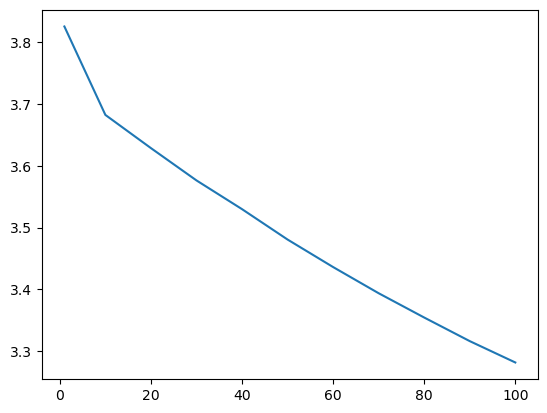

Min RMSE :  3.2815251570587325


In [5]:
from scipy.sparse import coo_matrix
import scipy.sparse.linalg

merged_df = pd.concat([df_train,df_test], axis=0)

merged_df['user_id'] = merged_df['user_id'].factorize()[0]
merged_df['business_id'] = merged_df['business_id'].factorize()[0]

df_train = merged_df.iloc[:len(df_train)]
df_test = merged_df.iloc[len(df_train):]

range_of_k = [1,10,20,30,40,50,60,70,80,90,100]


rows = df_train['user_id'].astype(int)
cols = df_train['business_id'].astype(int)
values = pd.to_numeric(df_train['stars'])

R = coo_matrix((values,(rows,cols)))

k=100
#U, S, V = sp.sparse.linalg.svds(R,k=100)


def SVD(user_id,business_id):
    result = np.dot(np.dot(U[int(user_id),:],np.diag(S)),V[:,int(business_id)])
    return result
rmse_matrix = []

for i in range_of_k:
    print("SVD for k=",i)
    U, S, V = sp.sparse.linalg.svds(R,k=i)
    df_train['k_'+str(i)] = df_train.apply(lambda x: SVD(x['user_id'],x['business_id']), axis=1)
    df_train['difference'+str(i)] = df_train['stars'] - df_train['k_'+str(i)]
    df_train['diff_squared'+str(i)] = df_train['difference'+str(i)]**2
    mse = df_train['diff_squared'+str(i)].mean()
    rmse = np.sqrt(mse)
    if(rmse>=5):
        rmse = 5
    elif(rmse<=0):
        rmse = 0
    rmse_matrix.append(rmse)

k_values = [int(i) for i in range_of_k]

plt.plot(k_values,rmse_matrix)
plt.show()
print("Min RMSE : ",min(rmse_matrix))

    
 




#ASKISI 2.5


In [7]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

df_test = pd.read_csv('phily_users_businesses_stars_test.csv')
df_train = pd.read_csv('phily_users_businesses_stars_train.csv')

average_stars_by_user = df_train.groupby("user_id")["stars"].mean()
average_stars_by_business = df_train.groupby("business_id")["stars"].mean()


#print(average_stars_by_user)

df_train['stars_minus_avg_stars'] = pd.to_numeric(df_train['stars']) - df_train['user_id'].map(average_stars_by_user)
values = pd.to_numeric(df_train['stars_minus_avg_stars'])

#Factorize train and test
merged_df = pd.concat([df_train,df_test], axis=0)

merged_df['user_id'] = merged_df['user_id'].factorize()[0]
merged_df['business_id'] = merged_df['business_id'].factorize()[0]

df_train = merged_df.iloc[:len(df_train)]
df_test = merged_df.iloc[len(df_train):]




rows = df_train['user_id'].astype(int)
cols = df_train['business_id'].astype(int)

R1 = csr_matrix((values,(rows,cols)))
#df_train = df_train.drop('similarity',axis=1)
#df_test = df_test.drop('stars_minus_avg_stars',axis=1)
#print(R1[6959, 368])
#print(R1)

def predict(u,b,K):
    #print(u,b)
    users_who_rated_b = df_train[df_train["business_id"]==b]
    business_that_u_rated = df_test[(df_test["user_id"]==u) & (df_test["business_id"]==b)]

    business_that_u_rated = business_that_u_rated.drop("stars_minus_avg_stars",axis=1)
    users_who_rated_b = users_who_rated_b.drop("stars_minus_avg_stars",axis=1)


    users_who_rated_b['similarity'] = users_who_rated_b.apply(lambda x: cosine_similarity(np.array(x).reshape(1, -1),business_that_u_rated)[0][0], axis=1)
    users_who_rated_b = users_who_rated_b.sort_values(by='similarity', ascending=False).head(K)
    
    ru = df_train[df_train["user_id"]==u]["stars"].mean()
    #print(ru)
    
    users_who_rated_b["S_times_R"] = users_who_rated_b.apply(lambda y: pd.to_numeric(y['similarity'])*R1[int(y['user_id']),int(b)], axis=1)
    sum_of_S_times_R = users_who_rated_b["S_times_R"].sum()
    sum_of_S = users_who_rated_b["similarity"].sum()

    p = ru + (sum_of_S_times_R/sum_of_S)
    if p<=0:
        p=0
    elif p>=5:
        p=5

    #print ("prediction  = ",p)
    return users_who_rated_b,business_that_u_rated
    



df_test['prediction'] = df_test.apply(lambda z: predict(z["user_id"],z["business_id"],10), axis=1)
print(df_test['prediction'])



KeyboardInterrupt: 

#ASKISI2.7


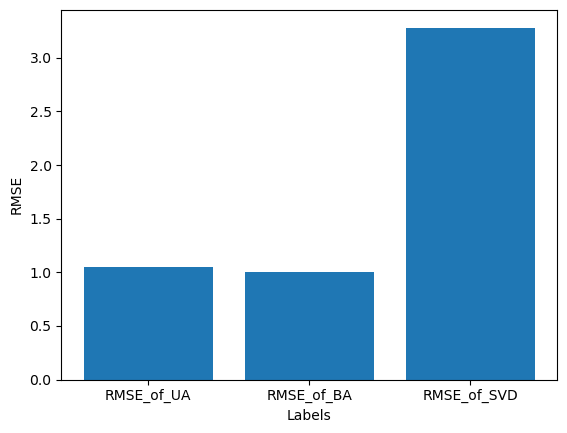

In [8]:
RMSE_of_UA = rmse1
RMSE_of_BA = rmse2
RMSE_of_SVD = min(rmse_matrix)

labels = ['RMSE_of_UA','RMSE_of_BA','RMSE_of_SVD']
rmse_values = [RMSE_of_UA,RMSE_of_BA,RMSE_of_SVD]

plt.bar(labels, rmse_values)
plt.xlabel('Labels')
plt.ylabel('RMSE')

plt.show()

#ASKISI 3 DATA PREPARATION


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


df_businesses = pd.read_csv('phily_businesses.csv')
df_businesses = df_businesses.dropna(subset=['categories'])
df_businesses = df_businesses[df_businesses['categories'].str.contains("Restaurant")]
print(df_businesses.shape)

#kai afto 1073 rows vgazei kai o allos tropos me to lambda
'''df_jap = df_businesses[df_businesses['categories'].str.contains("Japanese")]

df_Ita = df_businesses[df_businesses['categories'].str.contains("Italian")]

df_Bur = df_businesses[df_businesses['categories'].str.contains("Burgers")]

df_businesses = pd.concat([df_jap,df_Bur])
df_businesses = pd.concat([df_businesses,df_Ita])
df_businesses = df_businesses[~(df_businesses['categories'].str.contains('Italian', case=False, na=False) & df_businesses['categories'].str.contains('Burger', case=False, na=False))]
df_businesses = df_businesses[~(df_businesses['categories'].str.contains('Italian', case=False, na=False) & df_businesses['categories'].str.contains('Japanese', case=False, na=False))]
df_businesses = df_businesses[~(df_businesses['categories'].str.contains('Japanese', case=False, na=False) & df_businesses['categories'].str.contains('Burger', case=False, na=False))]
df_businesses = df_businesses[~(df_businesses['categories'].str.contains('Italian', case=False, na=False) & df_businesses['categories'].str.contains('Burger', case=False, na=False) & df_businesses['categories'].str.contains('Japanese', case=False, na=False))]
print(df_businesses.shape)'''


restaurantTypes = ['Japanese', 'Italian', 'Burgers']
df_businesses['keywords'] = df_businesses['categories'].apply(lambda x: sum(1 for type in restaurantTypes if type in x))
print(df_businesses['keywords'])
df_businesses = df_businesses[df_businesses['keywords'] == 1]
print(df_businesses.shape)
df_businesses.drop('keywords', axis=1, inplace=True)



chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True,chunksize=100000)
df_reviews = pd.DataFrame()

for chunk in chunks:
    temp = chunk[chunk['business_id'].isin(df_businesses['business_id'])]
    df_reviews = pd.concat([df_reviews,temp])
print(df_reviews)



merged_reviews = df_reviews[['business_id','text']].groupby('business_id').agg({'text': ' '.join})
print(merged_reviews['text'])
#df_reviews = df_reviews.sort_values('business_id')


print("finished")


(5854, 14)
0        0
1        1
2        0
3        1
4        0
        ..
14559    0
14561    1
14562    1
14563    0
14568    0
Name: keywords, Length: 5854, dtype: int64
(1073, 15)
                      review_id                 user_id  \
13       8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ   
49       cvQXRFLCyr0S7EgFb4lZqw  ZGjgfSvjQK886kiTzLwfLQ   
102      8GZbCEMxrbqmRinDbfHWVQ  OkjeFppodgJP_CvB84cJYw   
113      3dVcGYz6GokuEytLrfG8bA  FEI0XkOrUHufSW_rfOTPAA   
184      -xM8cH4AeVzgTJBQHlxfUQ  ZaMB7VbOwaARjxdhXjODxA   
...                         ...                     ...   
6989477  v7t0iEY4YnFiVYCMWfi7RA  Ltn-FyXdf8F7GW0nRB6nyw   
6989500  fcXXmkr0bZjsZ_l3clVAWw  ZMAZbnWSlKKwxh96A7lMrw   
6989532  UmO5D7ZXgT2Bzqh4wH0o3g  rn_B8ffTR_3ZlW9FcE1n3g   
6990047  jsBz-uJy6M--L8ogPG52dA  bJ5FtCtZX3ZZacz2_2PJjA   
6990219  YAAmRuqBqaFV6kW6ozjBpQ  aFLEltFU8TVgYS1C6tzuUA   

                    business_id  stars  useful  funny  cool  \
13       RZtGWDLCAtuipwaZ-UfjmQ      4    

#ASKISI 3.1


In [13]:

vectorizer = TfidfVectorizer(stop_words='english',max_df=0.6,max_features=1000)
vec = vectorizer.fit_transform(merged_reviews['text'])
print(vec)


kmeans = KMeans(n_clusters=3)
kmeans.fit(vec)
kmeans_clusters = kmeans.predict(vec)
#confusion_mat = confusion_matrix(kmeans_clusters,labels)
#print(f"confusion_matrix for kmeans : \n{confusion_mat}")

linkage = ['ward', 'complete', 'average', 'single']

for l in linkage:
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=l)
    agg_clustering.fit(vec.toarray())
    agglomerative_clusters = agg_clustering.fit_predict(vec.toarray())
    #confusion_mat = confusion_matrix(kmeans_clusters,labels)
    #print(f"confusion_matrix for {l} : \n{confusion_mat}")

print("finished")



  (0, 193)	0.013595455899961289
  (0, 653)	0.014274988463174015
  (0, 884)	0.01621053530419608
  (0, 819)	0.01997756481267947
  (0, 74)	0.01849406539776634
  (0, 281)	0.02315919945302783
  (0, 536)	0.015719884184305602
  (0, 318)	0.015940984997622566
  (0, 385)	0.015582343120286604
  (0, 82)	0.01724587377948269
  (0, 558)	0.016084982055262636
  (0, 17)	0.01202205385780252
  (0, 723)	0.019451452390307145
  (0, 683)	0.014964401802966171
  (0, 310)	0.013460345340271067
  (0, 964)	0.013415817869528529
  (0, 415)	0.015146598414572596
  (0, 144)	0.013082542339896542
  (0, 475)	0.01356523071883979
  (0, 570)	0.017897379791736594
  (0, 472)	0.02828810327563611
  (0, 812)	0.01525797103081649
  (0, 933)	0.012762777789578824
  (0, 443)	0.01261431080901307
  (0, 297)	0.025772728131576033
  :	:
  (1072, 354)	0.02357610165238526
  (1072, 482)	0.02305324743425826
  (1072, 390)	0.027385079694662383
  (1072, 622)	0.02479238942550569
  (1072, 756)	0.023935523689911312
  (1072, 703)	0.022834850219398673


#ASKISI 3.2

In [14]:

centers = kmeans.cluster_centers_

for i, center in enumerate(centers):
    distancesFromCenter = np.linalg.norm(vec - center, axis=1)
    data = vec[np.argsort(distancesFromCenter)[-10:]]
    words = [np.argmax(vector) for vector in data]
    print(f'Top 10 words for center {i}: {words}')

print("finished")


Top 10 words for center 0: [641, 863, 641, 863, 123, 863, 863, 863, 228, 863]
Top 10 words for center 1: [686, 686, 686, 686, 863, 228, 863, 686, 686, 686]
Top 10 words for center 2: [273, 641, 777, 448, 777, 641, 641, 641, 641, 641]
finished


#ASKISI 3.4

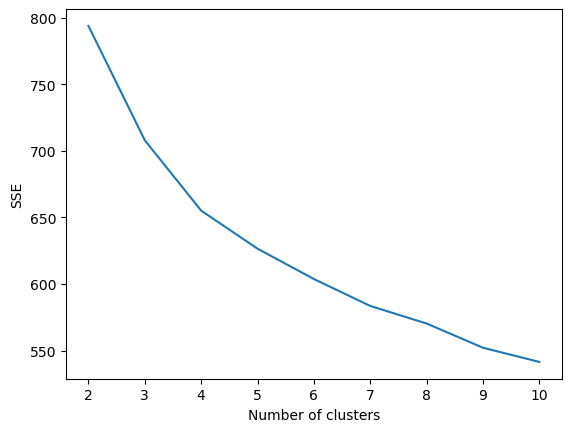

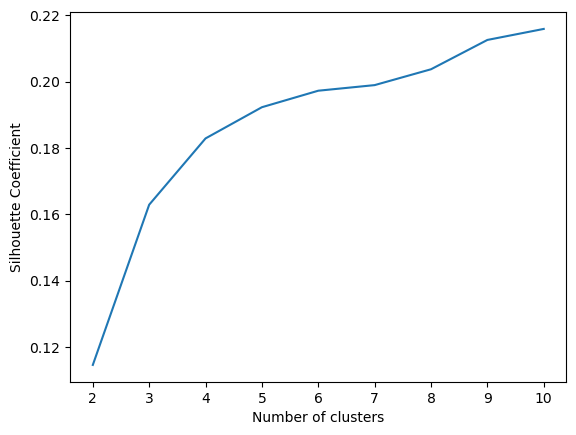

Top 10 words for center 1: [686, 686, 686, 686, 228, 863, 863, 686, 686, 686]
Top 10 words for center 2: [448, 119, 777, 641, 777, 641, 104, 641, 641, 641]
Top 10 words for center 3: [689, 974, 448, 641, 686, 641, 273, 686, 641, 641]
Top 10 words for center 4: [448, 977, 273, 686, 686, 686, 686, 123, 863, 228]
Top 10 words for center 5: [686, 863, 641, 454, 686, 686, 641, 686, 863, 686]
Top 10 words for center 6: [686, 686, 686, 686, 686, 686, 686, 228, 686, 686]
Top 10 words for center 7: [686, 686, 686, 656, 686, 686, 863, 686, 228, 686]
Top 10 words for center 8: [789, 273, 641, 641, 641, 641, 641, 641, 641, 641]
Top 10 words for center 9: [686, 686, 863, 863, 686, 686, 686, 686, 863, 686]
finished


In [17]:

k_range = [i for i in range(2,11)]

sse = []
silhouette_coefficients = []

# Perform k-means for each value of n_clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vec)
    sse.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(vec, kmeans.labels_))

plt.figure()
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

plt.figure()
plt.plot(k_range, silhouette_coefficients)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


kmeans = KMeans(n_clusters=9)
kmeans.fit(vec)
centers = kmeans.cluster_centers_

for i, center in enumerate(centers):
    distancesFromCenter = np.linalg.norm(vec - center, axis=1)
    data = vec[np.argsort(distancesFromCenter)[-10:]]
    words = [np.argmax(vector) for vector in data]
    print(f'Top 10 words for center {i+1}: {words}')

print("finished")